# Exploratory data analysis

* import libraries, load data from pickle file
* create a column for trip length in minutes and calculate some summary statistics
* graph empirical cumulative distribution of trip lengths and then graph the same with outliers removed, which provides a clearer visualization of the trends in trip length
* delete rides that start or end outside of allowable city limits (possible errors or thefts that we want to ignore for now)
* compare member vs casual rides
* plot histograms for each numerical variable
* plot daily and hourly departures
* plot a heatmap to get a better sense of relationships within data

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
file_path = 'data/processed/divvy_data_cleaned.pkl'
df = pd.read_pickle(file_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11272007 entries, 0 to 11272758
Data columns (total 25 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             string         
 1   rideable_type       string         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  string         
 5   end_station_name    string         
 6   start_lat           Float64        
 7   start_lng           Float64        
 8   end_lat             Float64        
 9   end_lng             Float64        
 10  member_casual       string         
 11  start_id            string         
 12  end_id              string         
 13  start_hour          datetime64[ns] 
 14  start_day           datetime64[ns] 
 15  start_month         int32          
 16  start_year          int32          
 17  start_dayofweek     int32          
 18  start_holiday       int64          
 19  SNOW                stri

In [58]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,...,start_month,start_year,start_dayofweek,start_holiday,SNOW,TMAX,TMIN,PRCP,SNWD,trip_duration
0,6A9D809ABDF70617,electric_bike,2024-01-01 00:00:39,2024-01-01 00:07:56,<NA>,Clark St & Wrightwood Ave,41.95,-87.65,41.93,-87.643,...,1,2024,0,0,0,11,-17,0,0,0 days 00:07:17
1,26B9F6E416A68EBA,electric_bike,2024-01-01 00:00:50,2024-01-01 00:04:20,<NA>,<NA>,41.9,-87.62,41.9,-87.62,...,1,2024,0,0,0,11,-17,0,0,0 days 00:03:30
2,30EF016A0DF5ECEE,electric_bike,2024-01-01 00:00:52,2024-01-01 00:04:25,<NA>,<NA>,41.9,-87.62,41.9,-87.62,...,1,2024,0,0,0,11,-17,0,0,0 days 00:03:33
3,0D9E85F804C85828,electric_bike,2024-01-01 00:00:53,2024-01-01 00:22:30,Clinton St & Madison St,<NA>,41.882,-87.641,41.89,-87.62,...,1,2024,0,0,0,11,-17,0,0,0 days 00:21:37
4,56F5C3ED5178C131,classic_bike,2024-01-01 00:01:01,2024-01-01 00:24:12,LaSalle St & Illinois St,Indiana Ave & Roosevelt Rd,41.891,-87.632,41.868,-87.623,...,1,2024,0,0,0,11,-17,0,0,0 days 00:23:11


## Calculating summary statistics

In [59]:
minutes = []
for duration in df['trip_duration']:
    minutes.append(duration.total_seconds()/60)

In [60]:
df['trip_duration_minutes'] = minutes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11272007 entries, 0 to 11272758
Data columns (total 26 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   ride_id                string         
 1   rideable_type          string         
 2   started_at             datetime64[ns] 
 3   ended_at               datetime64[ns] 
 4   start_station_name     string         
 5   end_station_name       string         
 6   start_lat              Float64        
 7   start_lng              Float64        
 8   end_lat                Float64        
 9   end_lng                Float64        
 10  member_casual          string         
 11  start_id               string         
 12  end_id                 string         
 13  start_hour             datetime64[ns] 
 14  start_day              datetime64[ns] 
 15  start_month            int32          
 16  start_year             int32          
 17  start_dayofweek        int32          
 18  start

In [61]:
np.mean(minutes)

16.73099160749871

In [62]:
np.median(minutes)

9.6

In [63]:
np.std(minutes)

58.482647183390135

The mean and median show that trip duration is skewed by a few unusually long trips. Determining cutoffs for outliers (using the standard definition of 1.5 times the interquartile range from the 25th and 75th percentiles):

In [64]:
ptile1 = np.percentile(minutes, 25)
ptile1

5.483333333333333

In [65]:
ptile3 = np.percentile(minutes, 75)
ptile3

16.966666666666665

In [66]:
iqr = ptile3 - ptile1
low_cutoff=ptile1 - 1.5*iqr
high_cutoff=ptile3 + 1.5*iqr

In [67]:
df_no_outliers = df[df['trip_duration_minutes'] <= high_cutoff]

In [68]:
df_no_outliers.reset_index(drop = True)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,...,start_year,start_dayofweek,start_holiday,SNOW,TMAX,TMIN,PRCP,SNWD,trip_duration,trip_duration_minutes
0,6A9D809ABDF70617,electric_bike,2024-01-01 00:00:39,2024-01-01 00:07:56,<NA>,Clark St & Wrightwood Ave,41.95,-87.65,41.93,-87.643,...,2024,0,0,0,11,-17,0,0,0 days 00:07:17,7.283333
1,26B9F6E416A68EBA,electric_bike,2024-01-01 00:00:50,2024-01-01 00:04:20,<NA>,<NA>,41.9,-87.62,41.9,-87.62,...,2024,0,0,0,11,-17,0,0,0 days 00:03:30,3.500000
2,30EF016A0DF5ECEE,electric_bike,2024-01-01 00:00:52,2024-01-01 00:04:25,<NA>,<NA>,41.9,-87.62,41.9,-87.62,...,2024,0,0,0,11,-17,0,0,0 days 00:03:33,3.550000
3,0D9E85F804C85828,electric_bike,2024-01-01 00:00:53,2024-01-01 00:22:30,Clinton St & Madison St,<NA>,41.882,-87.641,41.89,-87.62,...,2024,0,0,0,11,-17,0,0,0 days 00:21:37,21.616667
4,56F5C3ED5178C131,classic_bike,2024-01-01 00:01:01,2024-01-01 00:24:12,LaSalle St & Illinois St,Indiana Ave & Roosevelt Rd,41.891,-87.632,41.868,-87.623,...,2024,0,0,0,11,-17,0,0,0 days 00:23:11,23.183333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10439591,E19A4F05BC8F5EC1,classic_bike,2025-11-30 23:38:18,2025-11-30 23:47:42,Broadway & Waveland Ave,Clarendon Ave & Leland Ave,41.949,-87.649,41.968,-87.65,...,2025,6,0,5,11,-67,3,<NA>,0 days 00:09:24,9.400000
10439592,D953F4F11B6AD9A3,electric_bike,2025-11-30 23:38:36,2025-11-30 23:47:21,Clinton St & Roosevelt Rd,Blue Island Ave & 18th St,41.867,-87.641,41.858,-87.662,...,2025,6,0,5,11,-67,3,<NA>,0 days 00:08:45,8.750000
10439593,FEFDD786F104FF68,electric_bike,2025-11-30 23:39:22,2025-11-30 23:39:58,Addison/Wilton Corral,Addison/Wilton Corral,41.947,-87.653,41.947,-87.653,...,2025,6,0,5,11,-67,3,<NA>,0 days 00:00:36,0.600000
10439594,6982EE63F71148AE,classic_bike,2025-11-30 23:44:44,2025-11-30 23:49:24,Paulina St & 18th St,Racine Ave & 18th St,41.858,-87.669,41.858,-87.656,...,2025,6,0,5,11,-67,3,<NA>,0 days 00:04:40,4.666667


In [69]:
df_no_outliers = df_no_outliers[df_no_outliers['trip_duration_minutes'] >= low_cutoff]

In [70]:
df_no_outliers.reset_index(drop = True)
len(df_no_outliers)

10439596

In [71]:
df_no_outliers.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,start_hour,start_day,start_month,start_year,start_dayofweek,start_holiday,trip_duration,trip_duration_minutes
count,10439596,10439596,10439596.0,10439596.0,10439562.0,10439562.0,10439596,10439596,1.043960e+07,1.043960e+07,1.043960e+07,1.043960e+07,10439596,1.043960e+07
mean,2025-01-09 06:56:58.473550080,2025-01-09 07:07:46.886447872,41.903243,-87.646986,41.903539,-87.647228,2025-01-09 06:56:59.696128768,2025-01-09 09:11:57.971232,7.010432e+00,2.024483e+03,2.999407e+00,1.915783e-07,0 days 00:10:48.412900844,1.080688e+01
min,2024-01-01 00:00:39,2024-01-01 00:04:20,41.64,-87.91,16.06,-129.71,2024-01-01 00:00:00,2024-01-01 00:00:00,1.000000e+00,2.024000e+03,0.000000e+00,0.000000e+00,0 days 00:00:01,1.666667e-02
25%,2024-07-19 20:43:00.750000128,2024-07-19 20:55:04.249999872,41.881,-87.66,41.882,-87.66,2024-07-19 21:00:00,2024-07-20 00:00:00,5.000000e+00,2.024000e+03,1.000000e+00,0.000000e+00,0 days 00:05:13,5.216667e+00
50%,2024-11-27 17:06:00,2024-11-27 17:15:46,41.899,-87.643,41.899,-87.643,2024-11-27 17:00:00,2024-11-28 00:00:00,7.000000e+00,2.024000e+03,3.000000e+00,0.000000e+00,0 days 00:08:54,8.900000e+00
75%,2025-07-19 17:34:10,2025-07-19 17:46:42.500000,41.93,-87.63,41.93,-87.63,2025-07-19 18:00:00,2025-07-20 00:00:00,9.000000e+00,2.025000e+03,5.000000e+00,0.000000e+00,0 days 00:14:43,1.471667e+01
max,2025-11-30 23:51:43,2025-11-30 23:53:31,42.07,-87.52,83.14,152.53,2025-12-01 00:00:00,2025-12-01 00:00:00,1.200000e+01,2.025000e+03,6.000000e+00,1.000000e+00,0 days 00:34:11,3.418333e+01
std,NaN,NaN,0.044208,0.026999,0.048895,0.085128,NaN,NaN,2.636605e+00,4.996940e-01,1.954075e+00,4.376966e-04,0 days 00:07:24.738189381,7.412303e+00


In [72]:
(11272007 - 10439596)/11272007

0.07384762979653933

## Graphing empirical cumulative distribution of trip lengths

In [73]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])

In [74]:
ptiles_duration = np.percentile(minutes, percentiles)

In [75]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [76]:
x_duration, y_duration = ecdf(df['trip_duration_minutes'])

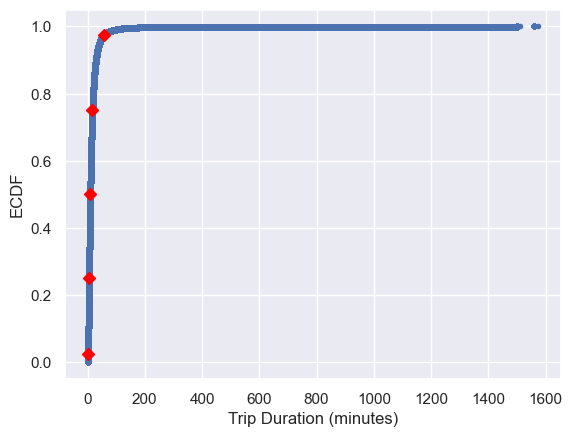

In [77]:
sns.set()
# Generate plot
_=plt.plot(x_duration, y_duration, marker = '.', linestyle = 'none')

# Label the axes
_=plt.xlabel('Trip Duration (minutes)')
_=plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_duration, percentiles/100, marker='D', color='red',
         linestyle='none')

# Display the plot
plt.show()

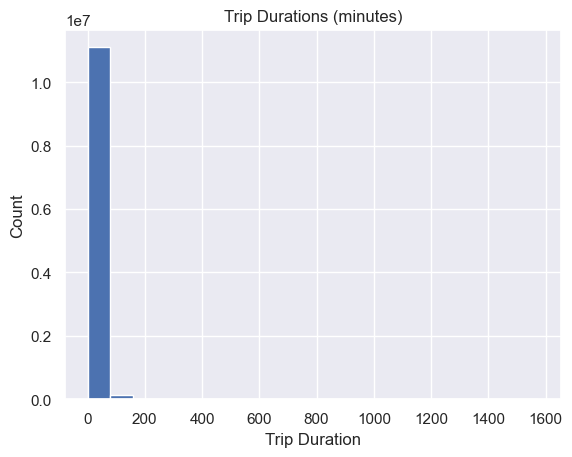

In [78]:
#sns.set()
_=plt.hist(df['trip_duration_minutes'], bins = 20)
_=plt.xlabel('Trip Duration')
_=plt.title('Trip Durations (minutes)')
_=plt.ylabel('Count')
plt.show()

## Removing the outliers, which represent less than 8% of the data, gives a much clearer picture of trip lengths

In [79]:
ptiles_duration = np.percentile(df_no_outliers['trip_duration_minutes'], percentiles)

In [80]:
x_duration_no_outliers, y_duration_no_outliers = ecdf(df_no_outliers['trip_duration_minutes'])

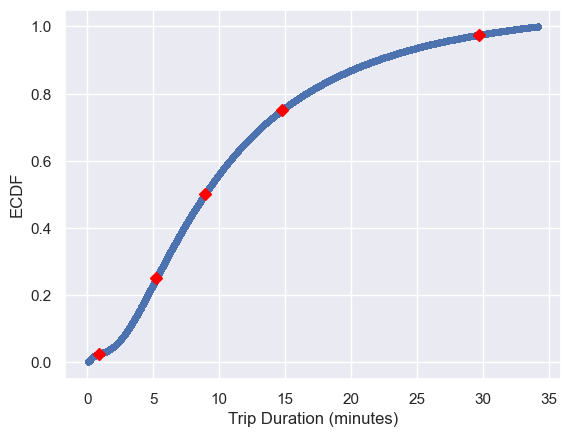

In [81]:
sns.set()
# Generate plot
_=plt.plot(x_duration_no_outliers, y_duration_no_outliers, marker = '.', linestyle = 'none')

# Label the axes
_=plt.xlabel('Trip Duration (minutes)')
_=plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_duration, percentiles/100, marker='D', color='red',
         linestyle='none')

# Display the plot
plt.show()

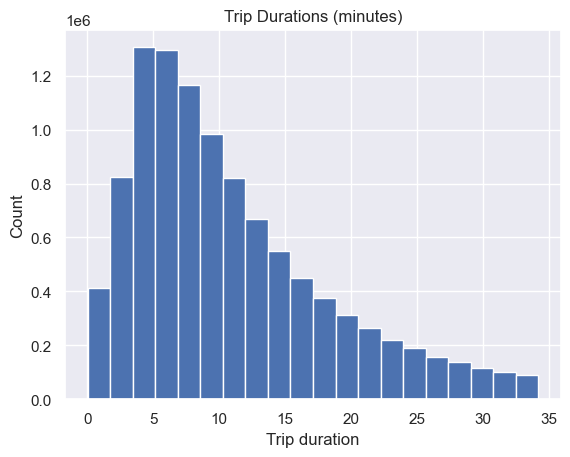

In [82]:
#sns.set()
_=plt.hist(df_no_outliers['trip_duration_minutes'], bins = 20)
_=plt.xlabel('Trip duration')
_=plt.ylabel('Count')
_=plt.title('Trip Durations (minutes)')
plt.show()

## Delete these rides that start or end outside of Chicago limits

In [83]:
#check = df[df['end_lat'] > 42.2]
check = df[df['end_lat'] < 41.5]
check.count()

ride_id                  23
rideable_type            23
started_at               23
ended_at                 23
start_station_name       15
end_station_name          0
start_lat                23
start_lng                23
end_lat                  23
end_lng                  23
member_casual            23
start_id                 15
end_id                    0
start_hour               23
start_day                23
start_month              23
start_year               23
start_dayofweek          23
start_holiday            23
SNOW                     23
TMAX                     23
TMIN                     23
PRCP                     23
SNWD                     23
trip_duration            23
trip_duration_minutes    23
dtype: int64

In [84]:
df = df[(df['end_lat'] > 41.5) & (df['end_lat'] < 42.4)]

In [85]:
check2 = df[df['end_lng'] < -88]
#check2 = df[df['end_lng'] > -87.4]
check2.count()

ride_id                  20
rideable_type            20
started_at               20
ended_at                 20
start_station_name       15
end_station_name          0
start_lat                20
start_lng                20
end_lat                  20
end_lng                  20
member_casual            20
start_id                 15
end_id                    0
start_hour               20
start_day                20
start_month              20
start_year               20
start_dayofweek          20
start_holiday            20
SNOW                     20
TMAX                     20
TMIN                     20
PRCP                     20
SNWD                     20
trip_duration            20
trip_duration_minutes    20
dtype: int64

In [86]:
df = df[(df['end_lng'] < -87.4) & (df['end_lng'] > -88)]

**Summary statistics again**

In [87]:
df.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,start_hour,start_day,start_month,start_year,start_dayofweek,start_holiday,trip_duration,trip_duration_minutes
count,11259320,11259320,11259320.0,11259320.0,11259320.0,11259320.0,11259320,11259320,1.125932e+07,1.125932e+07,1.125932e+07,1.125932e+07,11259320,1.125932e+07
mean,2025-01-08 10:48:12.560011264,2025-01-08 11:03:17.564910592,41.902947,-87.646354,41.903353,-87.646652,2025-01-08 10:48:13.053825792,2025-01-08 13:07:31.276702976,7.010510e+00,2.024480e+03,3.038685e+00,1.776306e-07,0 days 00:15:05.004901006,1.508342e+01
min,2024-01-01 00:00:39,2024-01-01 00:04:20,41.64,-87.91,41.51,-87.99,2024-01-01 00:00:00,2024-01-01 00:00:00,1.000000e+00,2.024000e+03,0.000000e+00,0.000000e+00,0 days 00:00:01,1.666667e-02
25%,2024-07-18 19:45:55.750000128,2024-07-18 20:04:00.750000128,41.881,-87.66,41.881,-87.66,2024-07-18 20:00:00,2024-07-19 00:00:00,5.000000e+00,2.024000e+03,1.000000e+00,0.000000e+00,0 days 00:05:29,5.483333e+00
50%,2024-11-23 17:30:23.500000,2024-11-23 17:42:59,41.898,-87.642,41.899,-87.643,2024-11-23 18:00:00,2024-11-24 00:00:00,7.000000e+00,2.024000e+03,3.000000e+00,0.000000e+00,0 days 00:09:36,9.600000e+00
75%,2025-07-19 09:02:58.750000128,2025-07-19 09:20:21,41.93,-87.63,41.93,-87.63,2025-07-19 09:00:00,2025-07-19 00:00:00,9.000000e+00,2.025000e+03,5.000000e+00,0.000000e+00,0 days 00:16:56,1.693333e+01
max,2025-11-30 23:51:43,2025-11-30 23:53:31,42.07,-87.52,42.32,-87.41,2025-12-01 00:00:00,2025-12-01 00:00:00,1.200000e+01,2.025000e+03,6.000000e+00,1.000000e+00,1 days 01:09:22,1.509367e+03
std,NaN,NaN,0.044609,0.027368,0.044779,0.027543,NaN,NaN,2.607994e+00,4.996086e-01,1.965110e+00,4.214625e-04,0 days 00:31:18.993485122,3.131656e+01


In [88]:
df_no_outliers.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,start_hour,start_day,start_month,start_year,start_dayofweek,start_holiday,trip_duration,trip_duration_minutes
count,10439596,10439596,10439596.0,10439596.0,10439562.0,10439562.0,10439596,10439596,1.043960e+07,1.043960e+07,1.043960e+07,1.043960e+07,10439596,1.043960e+07
mean,2025-01-09 06:56:58.473550080,2025-01-09 07:07:46.886447872,41.903243,-87.646986,41.903539,-87.647228,2025-01-09 06:56:59.696128768,2025-01-09 09:11:57.971232,7.010432e+00,2.024483e+03,2.999407e+00,1.915783e-07,0 days 00:10:48.412900844,1.080688e+01
min,2024-01-01 00:00:39,2024-01-01 00:04:20,41.64,-87.91,16.06,-129.71,2024-01-01 00:00:00,2024-01-01 00:00:00,1.000000e+00,2.024000e+03,0.000000e+00,0.000000e+00,0 days 00:00:01,1.666667e-02
25%,2024-07-19 20:43:00.750000128,2024-07-19 20:55:04.249999872,41.881,-87.66,41.882,-87.66,2024-07-19 21:00:00,2024-07-20 00:00:00,5.000000e+00,2.024000e+03,1.000000e+00,0.000000e+00,0 days 00:05:13,5.216667e+00
50%,2024-11-27 17:06:00,2024-11-27 17:15:46,41.899,-87.643,41.899,-87.643,2024-11-27 17:00:00,2024-11-28 00:00:00,7.000000e+00,2.024000e+03,3.000000e+00,0.000000e+00,0 days 00:08:54,8.900000e+00
75%,2025-07-19 17:34:10,2025-07-19 17:46:42.500000,41.93,-87.63,41.93,-87.63,2025-07-19 18:00:00,2025-07-20 00:00:00,9.000000e+00,2.025000e+03,5.000000e+00,0.000000e+00,0 days 00:14:43,1.471667e+01
max,2025-11-30 23:51:43,2025-11-30 23:53:31,42.07,-87.52,83.14,152.53,2025-12-01 00:00:00,2025-12-01 00:00:00,1.200000e+01,2.025000e+03,6.000000e+00,1.000000e+00,0 days 00:34:11,3.418333e+01
std,NaN,NaN,0.044208,0.026999,0.048895,0.085128,NaN,NaN,2.636605e+00,4.996940e-01,1.954075e+00,4.376966e-04,0 days 00:07:24.738189381,7.412303e+00


## Comparing member vs casual rides

In [89]:
member_rides = df[df['member_casual'] == 'member']
casual_rides = df[df['member_casual'] == 'casual']

member_rides.describe().T

,count,mean,min,25%,50%,75%,max,std
started_at,7147127,2025-01-06 03:57:34.028899840,2024-01-01 00:00:39,2024-07-16 16:39:56,2024-12-02 17:36:52,2025-07-17 18:07:28,2025-11-30 23:44:44,NaN
ended_at,7147127,2025-01-06 04:09:40.965666304,2024-01-01 00:07:56,2024-07-16 16:51:44,2024-12-02 17:47:44,2025-07-17 18:19:58.500000,2025-11-30 23:51:31,NaN
start_lat,7147127.0,41.902843,41.64,41.881,41.898,41.93,42.07,0.044422
start_lng,7147127.0,-87.64746,-87.91,-87.66,-87.644,-87.63,-87.52,0.026448
end_lat,7147127.0,41.90315,41.58,41.881,41.899,41.93,42.32,0.044597
end_lng,7147127.0,-87.647662,-87.99,-87.66,-87.644,-87.63,-87.41,0.026543
start_hour,7147127,2025-01-06 03:57:34.691931904,2024-01-01 00:00:00,2024-07-16 17:00:00,2024-12-02 18:00:00,2025-07-17 18:00:00,2025-12-01 00:00:00,NaN
start_day,7147127,2025-01-06 05:53:38.469241344,2024-01-01 00:00:00,2024-07-17 00:00:00,2024-12-03 00:00:00,2025-07-18 00:00:00,2025-12-01 00:00:00,NaN
start_month,7147127.0,6.921409,1.0,5.0,7.0,9.0,12.0,2.768025
start_year,7147127.0,2024.481333,2024.0,2024.0,2024.0,2025.0,2025.0,0.499651


In [90]:
casual_rides.describe().T

,count,mean,min,25%,50%,75%,max,std
started_at,4112193,2025-01-12 10:07:27.236002304,2024-01-01 00:00:50,2024-07-21 14:03:32,2024-11-10 20:52:12,2025-07-20 21:58:18,2025-11-30 23:51:43,NaN
ended_at,4112193,2025-01-12 10:27:41.729193216,2024-01-01 00:04:20,2024-07-21 14:31:26,2024-11-10 21:03:06,2025-07-20 22:20:20,2025-11-30 23:53:31,NaN
start_lat,4112193.0,41.903127,41.64,41.881,41.898,41.93,42.07,0.044932
start_lng,4112193.0,-87.644432,-87.9,-87.659,-87.64,-87.626,-87.52,0.028797
end_lat,4112193.0,41.903705,41.51,41.881,41.899,41.93,42.21,0.04509
end_lng,4112193.0,-87.644897,-87.99,-87.66,-87.64,-87.626,-87.44,0.029116
start_hour,4112193,2025-01-12 10:07:27.435712256,2024-01-01 00:00:00,2024-07-21 14:00:00,2024-11-10 21:00:00,2025-07-20 22:00:00,2025-12-01 00:00:00,NaN
start_day,4112193,2025-01-12 13:07:09.250960640,2024-01-01 00:00:00,2024-07-22 00:00:00,2024-11-11 00:00:00,2025-07-21 00:00:00,2025-12-01 00:00:00,NaN
start_month,4112193.0,7.16537,1.0,6.0,7.0,9.0,12.0,2.295338
start_year,4112193.0,2024.478285,2024.0,2024.0,2024.0,2025.0,2025.0,0.499528


## Plotting some histograms

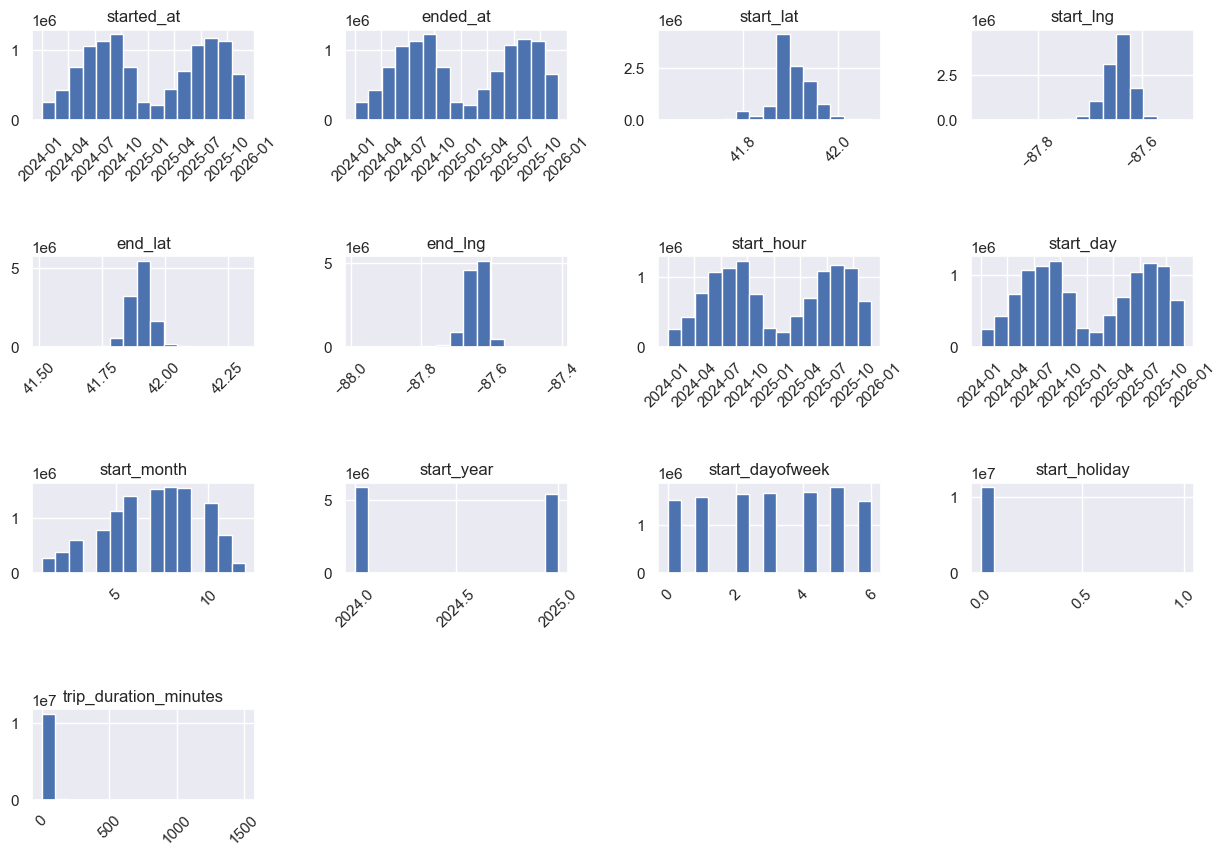

In [91]:
#histograms for each variable in df
hist = df.hist(bins=15,figsize =(15,10), xrot = 45)
plt.subplots_adjust(hspace=1.5, wspace=0.4)

## Hourly and daily rides

In [92]:
df_daily = df.set_index('started_at').resample('D').agg(ride_count=('ride_id', 'count')).fillna(0)
#df_daily.head()

In [93]:
df_hourly = df.set_index('started_at').resample('h').agg(ride_count=('ride_id', 'count')).fillna(0)
#df_hourly.head()

<Axes: title={'center': 'Hourly Rides'}, xlabel='Start Hour', ylabel='Count'>

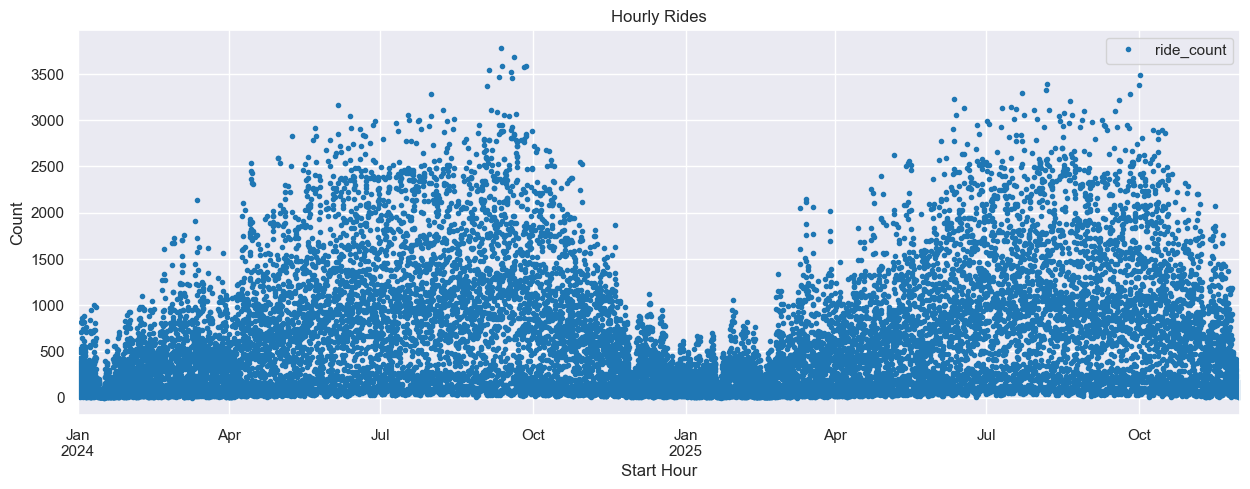

In [94]:
color_pal = sns.color_palette("tab10")
df_hourly.plot(style = '.', figsize = (15, 5), color = color_pal[0], xlabel = 'Start Hour', ylabel = 'Count', title = 'Hourly Rides')

<Axes: title={'center': 'Daily Rides'}, xlabel='Start Day', ylabel='Count'>

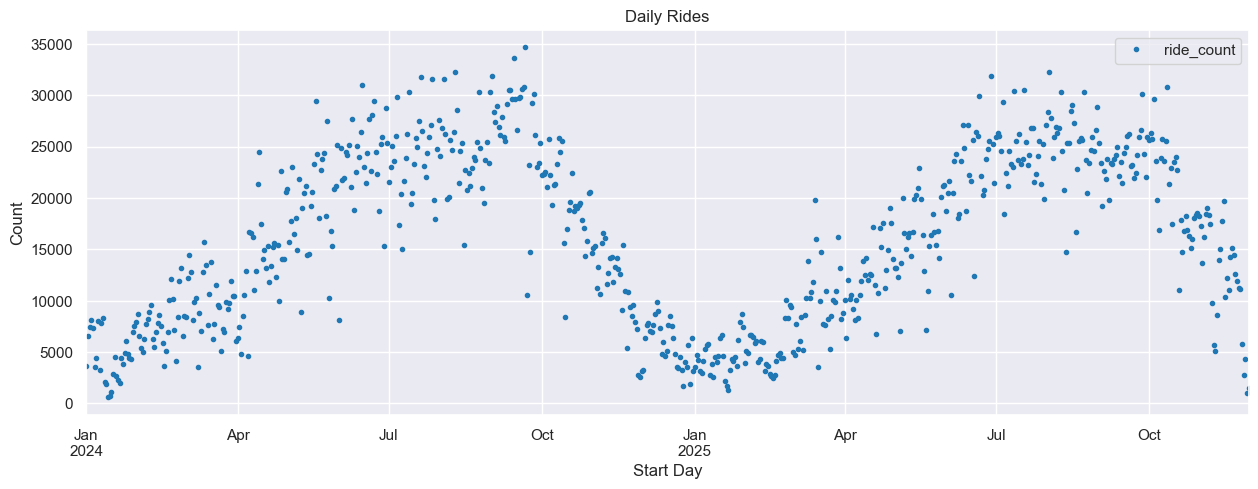

In [95]:
df_daily.plot(style = '.', figsize = (15, 5), color = color_pal[0], xlabel = 'Start Day', ylabel = 'Count', title = 'Daily Rides')

## Heatmap

In [96]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,...,start_year,start_dayofweek,start_holiday,SNOW,TMAX,TMIN,PRCP,SNWD,trip_duration,trip_duration_minutes
0,6A9D809ABDF70617,electric_bike,2024-01-01 00:00:39,2024-01-01 00:07:56,<NA>,Clark St & Wrightwood Ave,41.95,-87.65,41.93,-87.643,...,2024,0,0,0,11,-17,0,0,0 days 00:07:17,7.283333
1,26B9F6E416A68EBA,electric_bike,2024-01-01 00:00:50,2024-01-01 00:04:20,<NA>,<NA>,41.9,-87.62,41.9,-87.62,...,2024,0,0,0,11,-17,0,0,0 days 00:03:30,3.500000
2,30EF016A0DF5ECEE,electric_bike,2024-01-01 00:00:52,2024-01-01 00:04:25,<NA>,<NA>,41.9,-87.62,41.9,-87.62,...,2024,0,0,0,11,-17,0,0,0 days 00:03:33,3.550000
3,0D9E85F804C85828,electric_bike,2024-01-01 00:00:53,2024-01-01 00:22:30,Clinton St & Madison St,<NA>,41.882,-87.641,41.89,-87.62,...,2024,0,0,0,11,-17,0,0,0 days 00:21:37,21.616667
4,56F5C3ED5178C131,classic_bike,2024-01-01 00:01:01,2024-01-01 00:24:12,LaSalle St & Illinois St,Indiana Ave & Roosevelt Rd,41.891,-87.632,41.868,-87.623,...,2024,0,0,0,11,-17,0,0,0 days 00:23:11,23.183333


In [97]:
df = df.drop(columns = 'ride_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11259320 entries, 0 to 11272758
Data columns (total 25 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   rideable_type          string         
 1   started_at             datetime64[ns] 
 2   ended_at               datetime64[ns] 
 3   start_station_name     string         
 4   end_station_name       string         
 5   start_lat              Float64        
 6   start_lng              Float64        
 7   end_lat                Float64        
 8   end_lng                Float64        
 9   member_casual          string         
 10  start_id               string         
 11  end_id                 string         
 12  start_hour             datetime64[ns] 
 13  start_day              datetime64[ns] 
 14  start_month            int32          
 15  start_year             int32          
 16  start_dayofweek        int32          
 17  start_holiday          int64          
 18  SNOW 

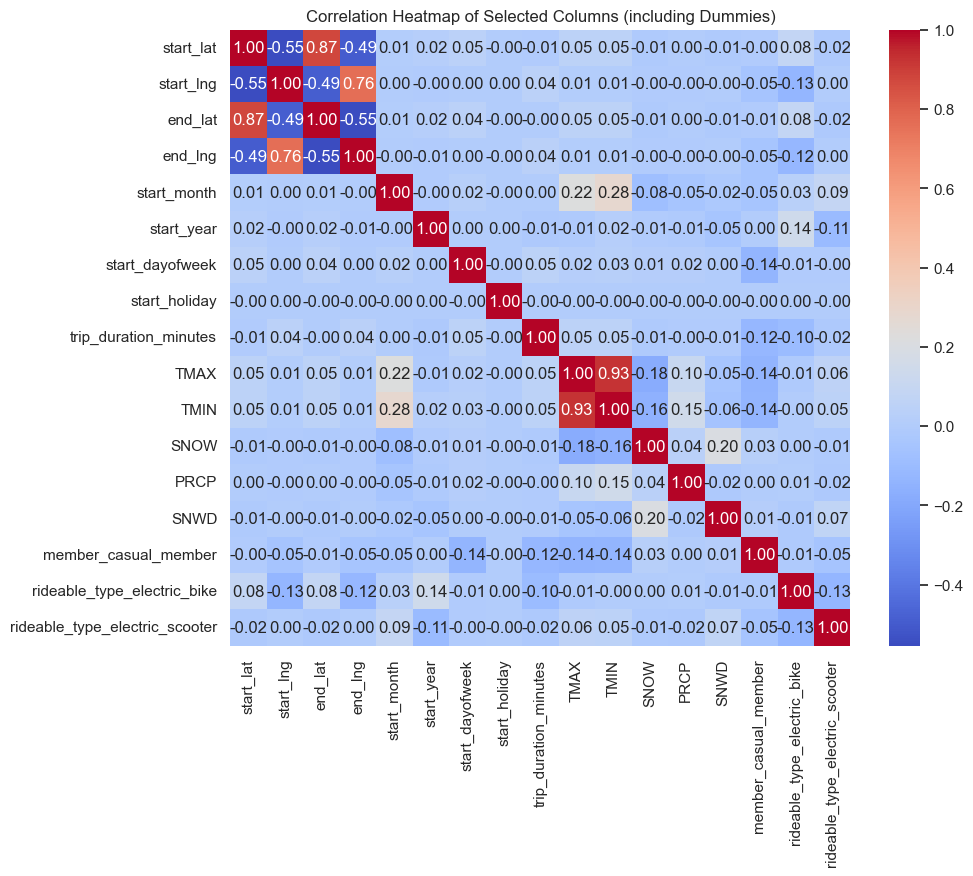

In [98]:
numerical_cols = ['start_lat', 'start_lng', 'end_lat', 'end_lng', 'start_month', 'start_year', 'start_dayofweek', 'start_holiday', 'trip_duration_minutes', 'TMAX', 'TMIN','SNOW', 'PRCP', 'SNWD']
categorical_cols_to_encode = ['member_casual', 'rideable_type'] # columns to get dummies for

df_processed = df[numerical_cols].copy()

#generate dummy variables for specified categorical columns and concatenate
for col in categorical_cols_to_encode:
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True) # drop_first=True helps prevent multicollinearity
    df_processed = pd.concat([df_processed, dummies], axis=1)

#compute correlation matrix
corr_matrix = df_processed.corr()

#plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Columns (including Dummies)')
plt.show()